In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ler o arquivo csv
data = pd.read_csv('C:\\Users\\Usuário\\Desktop\\Data science\\fundamentos da programação\\pythonProject3\\kc_house_data.csv')

In [3]:
#arredondando as casas da página em 2 casas
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [5]:
#observando os tipos
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#verificando os NAs
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
#vendo os duplicados e analisando se é viável a exclusão deles e por que
data[data['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.00,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
94,6021501535,20141223T000000,700000.00,3,1.50,1580,5000,1.00,0,0,...,8,1290,290,1939,0,98117,47.69,-122.39,1570,4500
313,4139480200,20140618T000000,1384000.00,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
314,4139480200,20141209T000000,1400000.00,4,3.25,4290,12103,1.00,0,3,...,11,2690,1600,1997,0,98006,47.55,-122.10,3860,11244
324,7520000520,20140905T000000,232000.00,2,1.00,1240,12092,1.00,0,0,...,6,960,280,1922,1984,98146,47.50,-122.35,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.00,4,2.50,2680,5539,2.00,0,0,...,8,2680,0,2013,0,98045,47.48,-121.73,2680,5992
20779,6300000226,20140626T000000,240000.00,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
20780,6300000226,20150504T000000,380000.00,4,1.00,1200,2171,1.50,0,0,...,7,1200,0,1933,0,98133,47.71,-122.34,1130,1598
21580,7853420110,20141003T000000,594866.00,3,3.00,2780,6000,2.00,0,0,...,9,2780,0,2013,0,98065,47.52,-121.89,2850,6000


In [8]:
#dropando os ids duplicados pois de acordo com minha análise foi erro no banco de dados
data1 = data.drop_duplicates(subset = 'id',keep = 'last')
data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [9]:
#descrição dos dados
data1.describe().T


,count,mean,std,min,25%,50%,75%,max
id,21436.00,4580765328.18,2876589633.67,1000102.00,2123700078.75,3904921185.00,7308675062.50,9900000190.00
price,21436.00,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,21436.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21436.00,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
sqft_lot,21436.00,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21436.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21436.00,0.24,0.77,0.00,0.00,0.00,0.00,4.00
condition,21436.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [10]:
#analisando outliers
data1[data1['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.00,33,1.75,1620,6000,1.00,0,0,...,7,1040,580,1947,0,98103,47.69,-122.33,1330,4700


In [11]:
#eliminando os outliers
data1 = data1.drop(15870)

 2.Transformação de dados

In [12]:
data2 = data1.copy()

In [13]:
#botando as datas em um formato adequado
data2['date'] = pd.to_datetime(data2['date'], format ='%Y-%m-%d')

In [14]:
data2['floors'] = data2['floors'].astype(int)

In [15]:
data2['month'] = data2['date'].dt.month
data2['year'] = data2['date'].dt.year

In [16]:
#adicionando colunas para análises com condicionais
data2['condition_type'] = data2['condition'].apply(lambda x: 'good' if x > 2 else 'bad')
data2['view_quality'] = data2['view'].apply(lambda x: 'good' if x > 2 else 'bad')
data2['renovated'] = data2['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')
data2['season'] = data2['month'].apply(lambda x: 'spring' if (x >=3) & (x<=5) else 
                                               'summer' if (x >=  6) & (x <= 8) else
                                               'fall' if (x >= 9 ) & (x <= 11) else
                                               'winter')
data2['Buy or not'] = 'NA'
data2.rename(columns = {'Buy or not':'Buy_or_not'}, inplace = True)
data2['Selling'] = 'NA'
data2['Profit'] = 'NA'
data2['age_house'] = data1['yr_built'].apply(lambda x : 'new' if x > 1955 else 'old')
data2['basement'] = data1['sqft_basement'].apply(lambda x: 'Sim' if x > 0 else 'No')

In [17]:
data2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,year,condition_type,view_quality,renovated,season,Buy_or_not,Selling,Profit,age_house,basement
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1,0,0,...,2014,good,bad,no,fall,NA,NA,NA,old,No
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2,0,0,...,2014,good,bad,yes,winter,NA,NA,NA,old,Sim
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1,0,0,...,2015,good,bad,no,winter,NA,NA,NA,old,No
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1,0,0,...,2014,good,bad,no,winter,NA,NA,NA,new,Sim
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1,0,0,...,2015,good,bad,no,winter,NA,NA,NA,new,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3,0,0,...,2014,good,bad,no,spring,NA,NA,NA,new,No
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2,0,0,...,2015,good,bad,no,winter,NA,NA,NA,new,No
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2,0,0,...,2014,good,bad,no,summer,NA,NA,NA,new,No
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2,0,0,...,2015,good,bad,no,winter,NA,NA,NA,new,No


3. Insights

In [18]:
# H1: Imóveis que possuem vista para água, são 20% mais caros, na média.

Falso. Os imóveis com vista são 211.76% mais caros que os imóveis sem vista


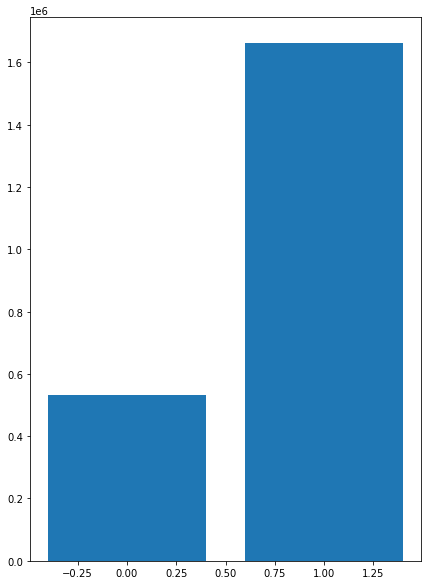

In [19]:
x = data2[['waterfront','price']].groupby(['waterfront']).mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x=x['waterfront'], height=x['price'])
x1 = (x.loc[1,'price']/x.loc[0,'price'] - 1) *100
print(f'Falso. Os imóveis com vista são {x1:.2f}% mais caros que os imóveis sem vista')

In [20]:
# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

Imóveis com data de construção menor que 1955 são -1.38% mais baratos que os imóveis construidos após 1955


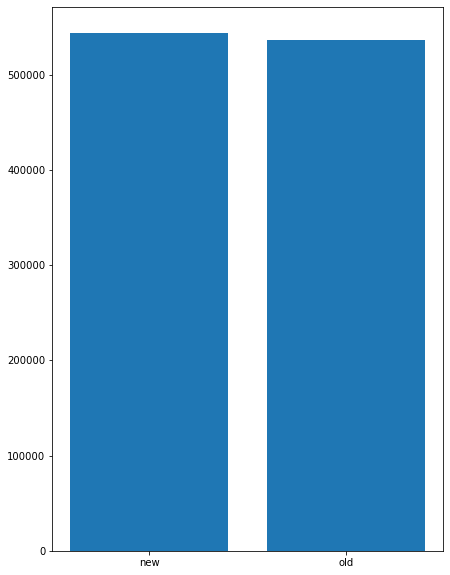

In [21]:
y = data2[['age_house','price']].groupby('age_house').mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x=y['age_house'], height=y['price'])
y1 = (y.loc[1,'price']/y.loc[0,'price'] -1)*100
print(f'Imóveis com data de construção menor que 1955 são {y1:.2f}% mais baratos que os imóveis construidos após 1955')

In [22]:
# H3: Imóveis sem porão (sqft_basement), são 40% maiores do que com porão em media.

Hipótese Falsa. Os Imóveis sem porão são maiores em 22.78% comparados a imóveis com porão


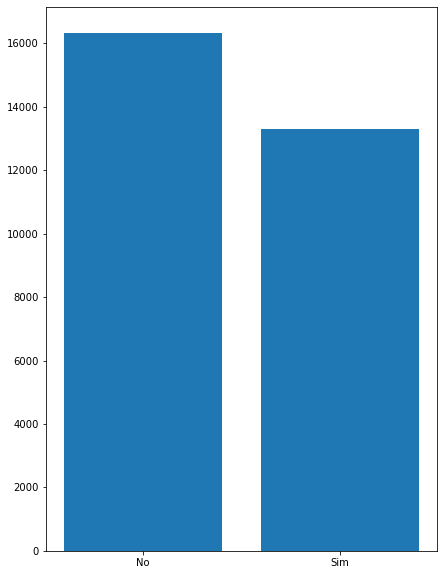

In [23]:
z = data2[['basement','sqft_lot']].groupby('basement').mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x = z['basement'],height = z['sqft_lot'] )
z1 = (z.loc[0,'sqft_lot']/z.loc[1,'sqft_lot'] - 1) * 100
print(f'Hipótese Falsa. Os Imóveis sem porão são maiores em {z1:.2f}% comparados a imóveis com porão')

In [24]:
# H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

Falso.Os imóveis de 2015 são mais caros em 0.18% comparados a imóveis de 2014


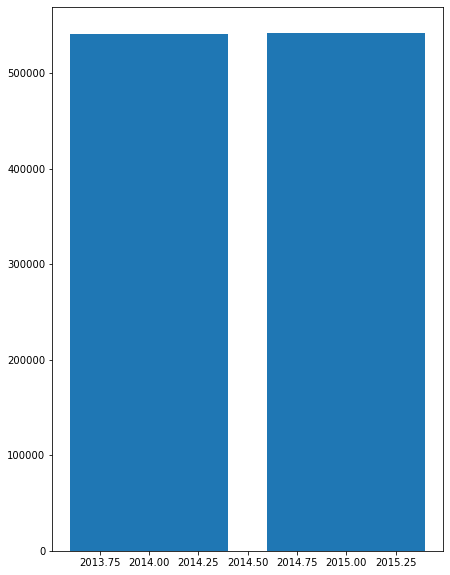

In [25]:
w = data2[['price','year']].groupby('year').mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x = w['year'],height = w['price'] )
w1 = (w.loc[1,'price']/w.loc[0,'price'] - 1) * 100
print(f'Falso.Os imóveis de 2015 são mais caros em {w1:.2f}% comparados a imóveis de 2014')

In [26]:
 # H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15% em média

Falso.Como podemos observar no gráfico, há muita variância com o resultado do mês 12 estando muito próximo do mês 1


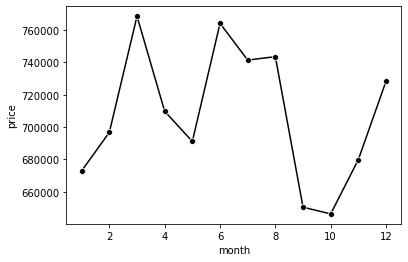

In [27]:
s = data2[['price','bathrooms','month']].groupby(['bathrooms','month']).mean().reset_index()

s1 = s[s['bathrooms'] == 3]
sns.lineplot(y=s1.price, x= s1.month, color = 'black', markers = True, style = (1), legend = False);
print(f'Falso.Como podemos observar no gráfico, há muita variância com o resultado do mês 12 estando muito próximo do mês 1')

In [28]:
#H6:  O preço da casa cai em média 30% a cada nível de condição

variação é 17.42373171591529%
variação é -3.9795551649871364%
variação é 63.29637802480881%
variação é -2.724462254141602%
Falso.O preço dos imóveis cai em média 18.50% a cada nível de condição


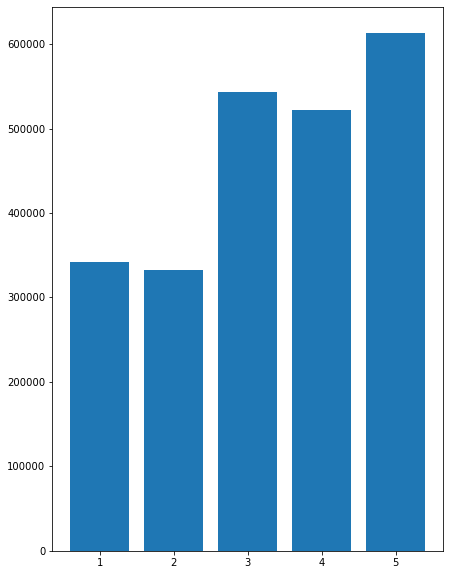

In [29]:
t = data2[['price','condition']].groupby('condition').mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x = t['condition'],height = t['price'] )
calculo = 0
for i in range(4,0,-1):
    perc = (t.loc[i,'price']/t.loc[i-1,'price'] -1) *100
    calculo = perc + calculo
    print(f'variação é {perc}%')
media_f = calculo/4
print(f'Falso.O preço dos imóveis cai em média {media_f:.2f}% a cada nível de condição')

    
    

In [30]:
#H7: As casas ficam 40% mais caras a cada andar

Falso. Média de preço dos imóveis com 3 andares é menor do que os imóveis com 2 andares.


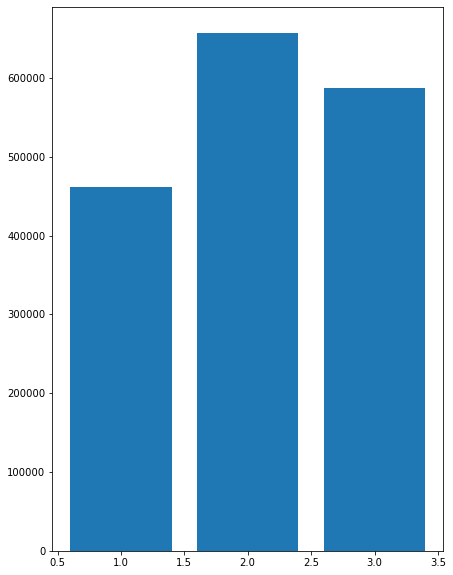

In [31]:
q = data2[['floors','price']].groupby('floors').mean('price').reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x = q['floors'],height = q['price'] )
print(f'Falso. Média de preço dos imóveis com 3 andares é menor do que os imóveis com 2 andares.')

In [32]:
#h8 : casas com boas vistas ( 3 pra cima) e boas condições ( 3 pra cima ) são 40% mais caras que as casas com boas vistas( 3 pra cima )

O preço dos imóveis em boas condições e boa vista é em média maior em 177.67 % do que os imóveis com boa vista mas em condições ruins


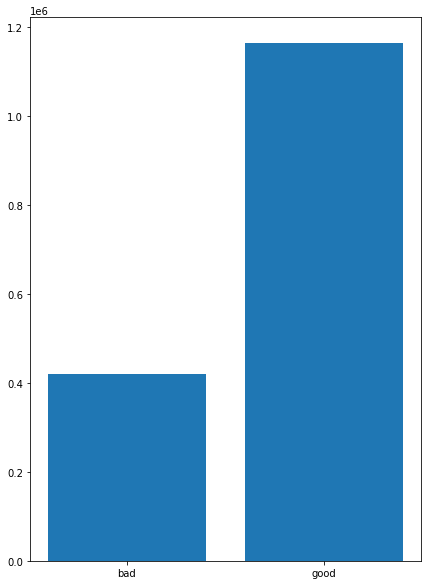

In [33]:
e = data2[['condition_type','price','view_quality']].groupby(['condition_type','view_quality']).mean().reset_index()
e1 = e[e['view_quality'] == 'good']
fig = plt.figure(figsize=(7,10))
plt.bar(x = e1['condition_type'],height = e1['price'] )
media2 = (e1.loc[3,'price'] / e1.loc[1,'price'] - 1) * 100
print(f'O preço dos imóveis em boas condições e boa vista é em média maior em {media2:.2f} % do que os imóveis com boa vista mas em condições ruins')

In [34]:
#h9: imóveis com reforma são 25% mais caros

O preço dos imóveis com reforma é em média maior em 43.29 % do que os imóveis sem reforma


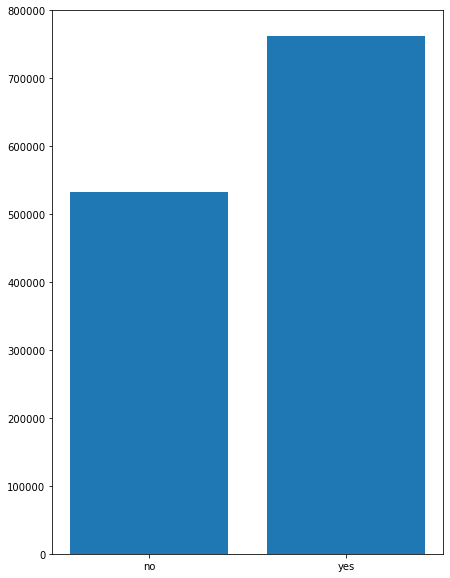

In [35]:
f = data2[['renovated','price']].groupby('renovated').mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x = f['renovated'],height = f['price'] )
media3 = (f.loc[1,'price'] / f.loc[0,'price'] - 1) * 100
print(f'O preço dos imóveis com reforma é em média maior em {media3:.2f} % do que os imóveis sem reforma')


In [36]:
#h10: imóveis são mais caros em 10% no verão

 Hipótese Falsa pois os imóveis na primavera são mais caros em 0.73% do que os imóveis no verão


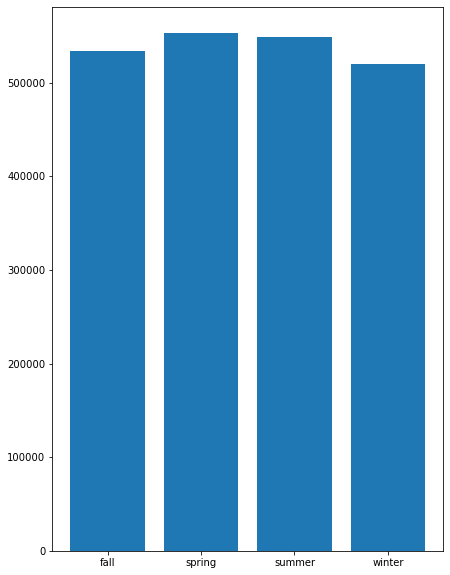

In [37]:
g = data2[['season','price']].groupby('season').mean().reset_index()
fig = plt.figure(figsize=(7,10))
plt.bar(x = g['season'],height = g['price'] )
media4 = (g.loc[1,'price']/g.loc[2,'price'] -1) * 100
print(f' Hipótese Falsa pois os imóveis na primavera são mais caros em {media4:.2f}% do que os imóveis no verão')

3 . Perguntas de negócio

In [38]:
#calculando a mediana por zipcode
mediana = data2[['zipcode','price']].groupby('zipcode').median().reset_index()
#fazendo a junção do dataset original com a mediana de cada zipcode
df = pd.merge(data2,mediana, on = 'zipcode', how = 'inner')


In [39]:
#verificando os imóveis aptos para compra se estiverem abaixo do preço da mediana e em condições razoáveis para cima
for i in range(len(df)):
    if (df.loc[i,'price_x'] < df.loc[i,'price_y']) & (df.loc[i,'condition'] >= 3):
        df.loc[i,'Buy_or_not'] = "Buy"
    else:
        df.loc[i,'Buy_or_not'] = "Dont Buy"

In [40]:
#selecionando apenas os imóveis aptos para compra
df1 = df[df['Buy_or_not'] == 'Buy']
df2 = df1.copy()

df2 = df2[['id', 'zipcode', 'price_x', 'price_y','condition', 'Buy_or_not','season']]
total = df2.shape[0]
overall = data.shape[0]
perc = (total/overall)*100

In [41]:
print(f'A quantidade de imóveis com condição de compra são de: {total} unidades')

print(f'A quantidade corresponde a {perc:.2f}% dos dados totais.')
df2.head(10)

A quantidade de imóveis com condição de compra são de: 10505 unidades
A quantidade corresponde a 48.61% dos dados totais.


,id,zipcode,price_x,price_y,condition,Buy_or_not,season
0,7129300520,98178,221900.00,279500.00,3,Buy,fall
1,4060000240,98178,205425.00,279500.00,4,Buy,summer
3,2976800796,98178,236000.00,279500.00,3,Buy,fall
4,6874200960,98178,170000.00,279500.00,3,Buy,winter
5,4268200055,98178,245000.00,279500.00,3,Buy,spring
6,3969300030,98178,239900.00,279500.00,3,Buy,winter
9,1180003090,98178,190000.00,279500.00,3,Buy,fall
10,561000075,98178,260000.00,279500.00,4,Buy,winter
13,3348401740,98178,188000.00,279500.00,3,Buy,winter
15,5476200160,98178,164808.00,279500.00,3,Buy,summer


3.2 Qual o melhor momento para vendê-las e por qual preço?

In [42]:
#calculando a mediana de preço da estação
sazonalidade = df2[['price_x','zipcode','season']].groupby(['zipcode','season']).median('price').reset_index()
sazonalidade

,zipcode,season,price_x
0,98001,fall,217500.00
1,98001,spring,210500.00
2,98001,summer,213300.00
3,98001,winter,228250.00
4,98002,fall,195250.00
...,...,...,...
275,98198,winter,220000.00
276,98199,fall,511200.00
277,98199,spring,543115.00
278,98199,summer,520000.00


In [43]:
#juntando os datasets
df3 = pd.merge(df2, sazonalidade, on = ['zipcode','season'], how = 'inner')
#mudando os nomes das colunas para melhor compreensão
df3.rename(columns= {'price_x_x':'Buying_price','price_y':'median','price_x_y':'season_median'}, inplace = True)

In [62]:
df3['selling_price'] = 'NA'
df3['Profit'] = 'NA'
df3['profit_margin'] = 'NA'
for i in range(len(df3)):
    if (df3.loc[i,'Buying_price'] < df3.loc[i,'season_median']):
        df3.loc[i,'selling_price'] = df3.loc[i,'Buying_price']*0.3 + df3.loc[i,'Buying_price']
        df3.loc[i,'profit_margin'] = 0.3
        df3.loc[i,'Profit'] = df3.loc[i,'Buying_price']*0.3
    else:
        df3.loc[i,'selling_price'] = df3.loc[i,'Buying_price']*0.1 + df3.loc[i,'Buying_price']
        df3.loc[i,'profit_margin'] = 0.1
        df3.loc[i,'Profit'] = df3.loc[i,'Buying_price']*0.1
total1 = df3['Profit'].sum()
total2 = df3['Buying_price'].sum()

In [63]:
print(f'Se todas as casas que estão aptas a serem compradas de acordo com o nosso filtro forem compradas, o lucro será de ${total1} com um custo de {total2}') 

Se todas as casas que estão aptas a serem compradas de acordo com o nosso filtro forem compradas, o lucro será de $752915970.5999995 com um custo de 4079586744.0


In [48]:
investment_options = df3[df3['profit_margin']==0.3]
count = investment_options.shape[0]


In [53]:
print(f'Se todas as casas com margem de lucro de 30% fossem compradas, um total de  {count} casas,que representa {count/total * 100:.2f}%, o custo seria de ${investment_options["Buying_price"].sum()}')
print(f'Se todas as casas com a margem de 30% de lucro fossem vendidas, teríamos um lucro de ${investment_options["selling_price"].sum() - investment_options["Buying_price"].sum()}')

Se todas as casas com margem de lucro de 30% fossem compradas, um total de  5139 casas,que representa 48.92%, o custo seria de $1724786481.0
Se todas as casas com a margem de 30% de lucro fossem vendidas, teríamos um lucro de $517435944.30000114
